In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

np.random.seed(42)

# Generar 2 predictores independientes
N = 100
x1 = np.random.uniform(0, 1, N)
x2 = np.random.uniform(0, 1, N)

# Funciones verdaderas suaves
f1_true = np.sin(2 * np.pi * x1)
f2_true = 0.5 * np.cos(4 * np.pi * x2)

y = f1_true + f2_true + np.random.normal(0, 0.3, N)

# Puntos para plot 3D
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
y_true_grid = np.sin(2 * np.pi * x1_grid) + 0.5 * np.cos(4 * np.pi * x2_grid)



In [22]:
def smoothing_spline_1d(x, y, lambda_smooth=0.1):
    n = len(x)
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]
    D = np.diff(np.eye(n), n=2, axis=0)
    k = D.T @ D
    XtX_lambdaK = np.eye(n) + lambda_smooth * k
    beta = linalg.solve(XtX_lambdaK, y_sorted)
    return beta, sort_idx # beta son los valores ajustados en x_sorted


# Ajuste separado para cada predictor
f1_fit, idx1 = smoothing_spline_1d(x1, y, lambda_smooth=0.01)
f2_fit, idx2 = smoothing_spline_1d(x2, y, lambda_smooth=0.01)

# Prediccion aditiva
y_gam = f1_fit[np.searchsorted(x1[idx1], x1)] + f2_fit[np.searchsorted(x2[idx2], x2)]


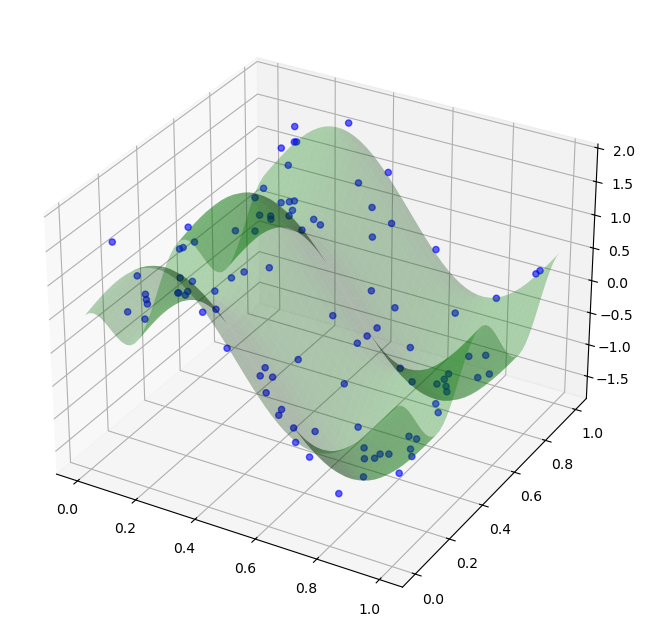

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Datos reales
ax.scatter(x1, x2, y, color='blue', alpha=0.6, label='Datos')

# Superficie verdadera
ax.plot_surface(x1_grid, x2_grid, y_true_grid, color='green', alpha=0.3, label='Verdadera')

# Superficie GAM aproximada (interpolada)
y_gam_grid = np.zeros_like(x1_grid)
for i in range(50):
    for j in range(50):
        idx_f1 = np.searchsorted(x1[idx1], x1_grid[i,j])
        idx_f1 = np.clip(idx_f1, 0, len(f1_fit)-1)  # Clip para evitar out of bounds
        idx_f2 = np.searchsorted(x2[idx2], x2_grid[i,j])
        idx_f2 = np.clip(idx_f2, 0, len(f2_fit)-1)
        y_gam_grid[i,j] = f1_fit[idx_f1] + f2_fit[idx_f2]